# K Nearest Neighbors

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Ingest the Data

### Kaggle Dataset Download

In [2]:
!pip install -q kaggle

In [8]:
#%pwd

In [9]:
#%mkdir ~/.kaggle

In [10]:
%pwd

'c:\\Users\\oyeog\\Practise\\KNN'

In [11]:
#%cd ~/

In [3]:
%cd Practise/KNN/

[WinError 3] The system cannot find the path specified: 'Practise/KNN/'
c:\Users\oyeog\Practise\KNN


In [4]:
%pwd

'c:\\Users\\oyeog\\Practise\\KNN'

In [5]:
api_token = {"username":"oyewoleogunbamise","key":"e6d28649e744d18bf699de1743fce20d"}

In [15]:
#!chmod 600 kaggle.json

In [16]:
"""import json
with open("Kaggle.json", "w") as file:
    json.dump(api_token, file)"""

'import json\nwith open("Kaggle.json", "w") as file:\n    json.dump(api_token, file)'

In [6]:
%pwd

'c:\\Users\\oyeog\\Practise\\KNN'

In [18]:
import shutil

In [19]:

#mv kaggle.json C:/Users/oyeog/.kaggle
#move C:\Users\oyeog\practice\KNN\kaggle.json C:\Users\oyeog\.kaggle
#shutil.move (r'C:\Users\oyeog\practise\KNN\kaggle.json', r'C:\Users\oyeog\.kaggle')

In [7]:
!kaggle datasets list

ref                                                                     title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
sudarshan24byte/online-food-dataset                                     Online Food Dataset                                  3KB  2024-03-02 18:50:30          14587        292  0.9411765        
sahirmaharajj/fuel-economy                                              Vehicle Fuel Economy                                 1MB  2024-03-20 18:27:18           1308         30  1.0              
kanchana1990/world-air-quality-data-2024-updated                        World Air Quality Data 2024 (Updated)                2MB  2024-03-25 15:10:07           1396         37  1.0              
syedanwarafridi/vehicle-s

In [8]:
!kaggle datasets download -d sudarshan24byte/online-food-dataset

online-food-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
import zipfile

with zipfile.ZipFile('online-food-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall()

#### Read File

In [23]:
%pwd

'c:\\Users\\oyeog\\Practise\\KNN'

In [10]:
data = pd.read_csv('onlinefoods.csv')

In [11]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [13]:
data.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


## Exploratory Data Analysis (EDA)

### Missing Values

In [14]:
#Count null values

data.isna().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

In [17]:
%pip install termcolor


Note: you may need to restart the kernel to use updated packages.


In [19]:

from termcolor import colored;

In [20]:
print(colored(f"\n Description of the data: \n", color='magenta', on_color='on_white', attrs=['bold', 'dark']));


 Description of the data: 



In [23]:
data[data.columns].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,388.0,24.628866,2.975593,18.0000,23.000000,24.0000,26.000000,33.0000
Family size,388.0,3.280928,1.351025,1.0000,2.000000,3.0000,4.000000,6.0000
latitude,388.0,12.972058,0.044489,12.8652,12.936900,12.9770,12.997025,13.1020
longitude,388.0,77.600160,0.051354,77.4842,77.565275,77.5921,77.630900,77.7582
Pin code,388.0,560040.113402,31.399609,560001.0000,560010.750000,560033.5000,560068.000000,560109.0000


## Plots

In [26]:
%pip install jinja2

   ---------------------------------------- 0.0/133.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/133.2 kB ? eta -:--:--
   -------- ------------------------------ 30.7/133.2 kB 640.0 kB/s eta 0:00:01
   ----------------------- --------------- 81.9/133.2 kB 907.3 kB/s eta 0:00:01
   ---------------------------------------- 133.2/133.2 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [27]:
_ = data[data.columns].nunique();
display(pd.concat((data[data.columns].describe().transpose().drop(['count'], axis =1), _), axis=1).\
        rename(columns={0: 'nunique'}).style.format('{:,.2f}'));

,mean,std,min,25%,50%,75%,max,nunique
Age,24.63,2.98,18.00,23.00,24.00,26.00,33.00,16.00
Family size,3.28,1.35,1.00,2.00,3.00,4.00,6.00,6.00
latitude,12.97,0.04,12.87,12.94,12.98,13.00,13.10,77.00
longitude,77.60,0.05,77.48,77.57,77.59,77.63,77.76,76.00
Pin code,"560,040.11",31.40,"560,001.00","560,010.75","560,033.50","560,068.00","560,109.00",77.00
Gender,nan,nan,nan,nan,nan,nan,nan,2.00
Marital Status,nan,nan,nan,nan,nan,nan,nan,3.00
Occupation,nan,nan,nan,nan,nan,nan,nan,4.00
Monthly Income,nan,nan,nan,nan,nan,nan,nan,5.00
Educational Qualifications,nan,nan,nan,nan,nan,nan,nan,5.00


In [42]:
def plot_graphs(data,feature, figsize=(12,7), kde=False):
    
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows
      sharex=True,  # Share the x-axis
      gridspec_kw={"height_ratios": (0.25, 0.75)},  # Set the height ratios
      figsize=figsize
    
  )  # creating subplots
    plt.title(f"Header: {feature}")
# check for integer type or categorical type before plotting
    try:
        sns.countplot(data=data, x=feature, ax=ax_box2)
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)
    except:
        if data[feature].dtypes == 'int64':
            sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)
        else:
            sns.countplot(data=data, x=feature, ax=ax_box2)    


In [30]:
data.columns    

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Output', 'Feedback', 'Unnamed: 12'],
      dtype='object')

In [31]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


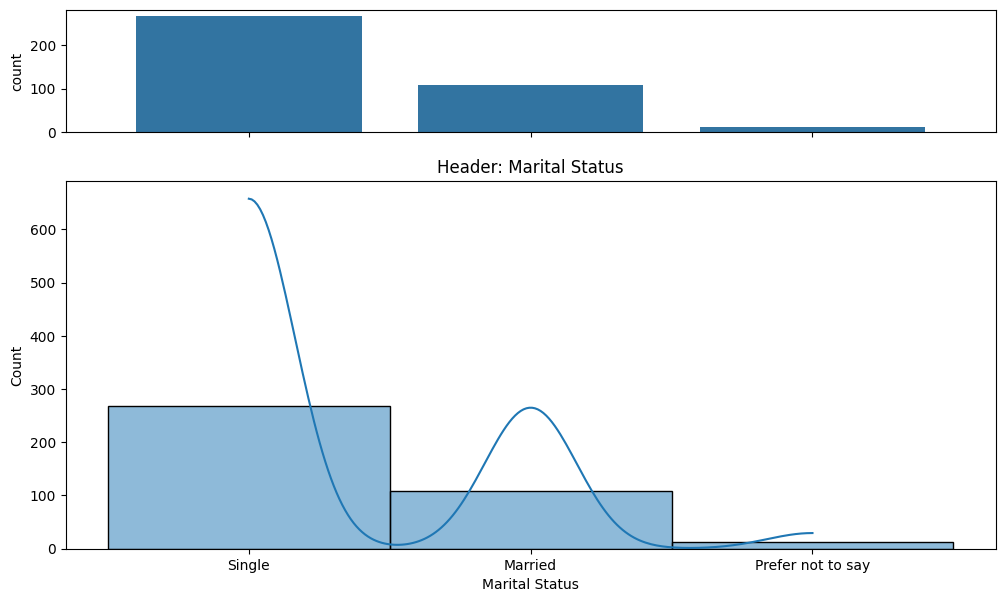

In [43]:
plot_graphs(data, 'Marital Status', kde=True)

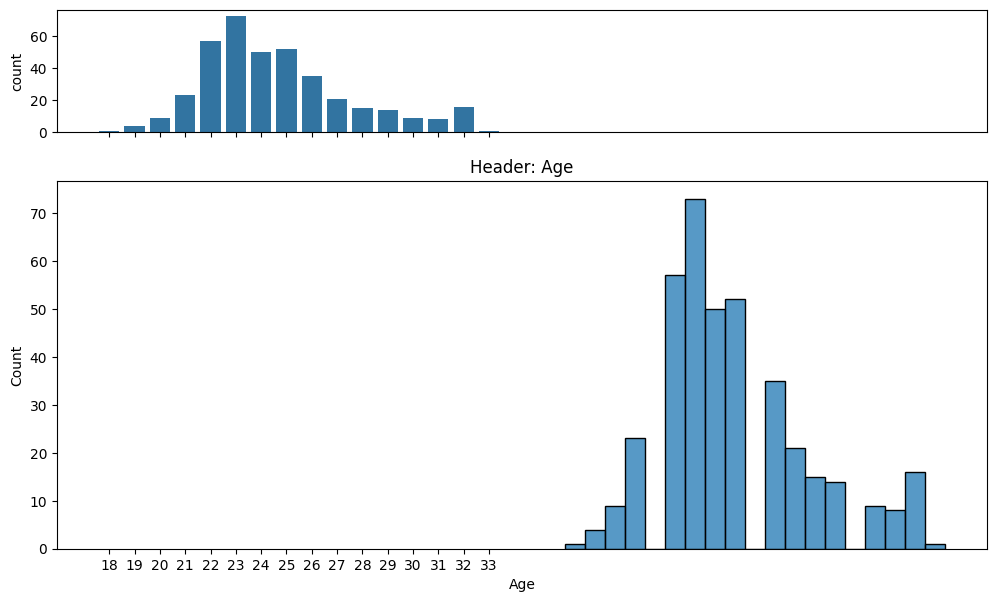

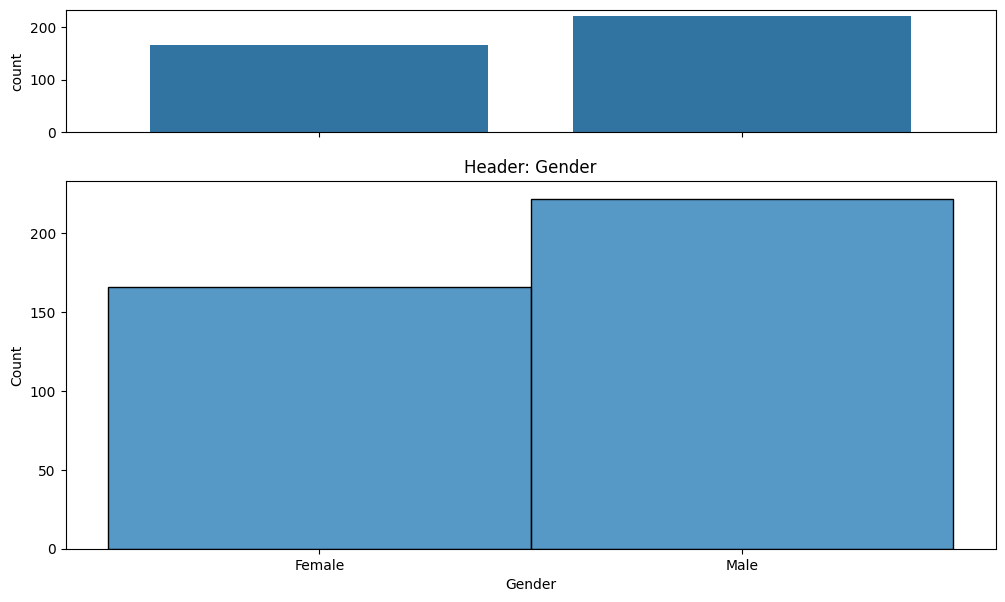

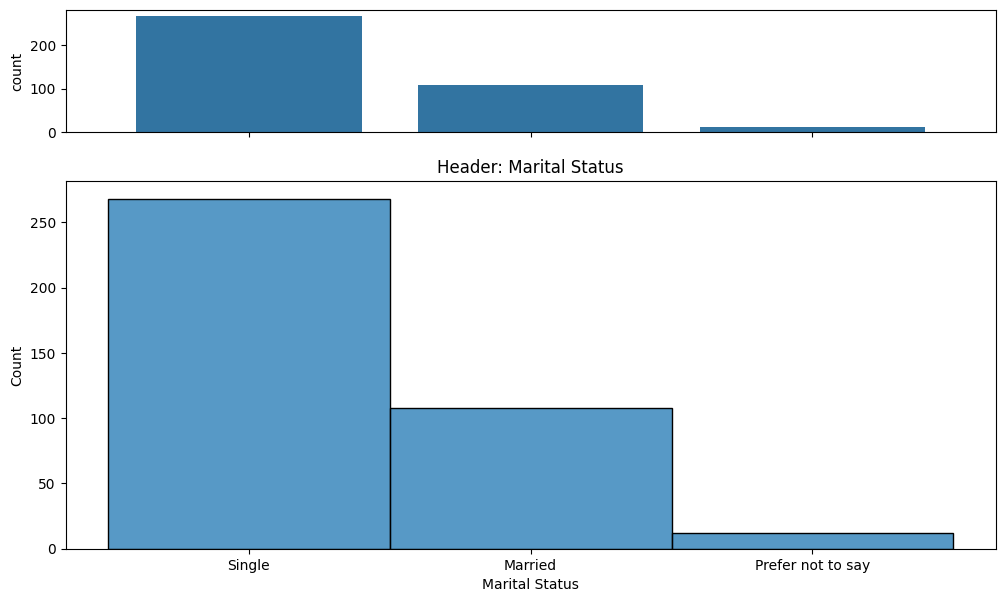

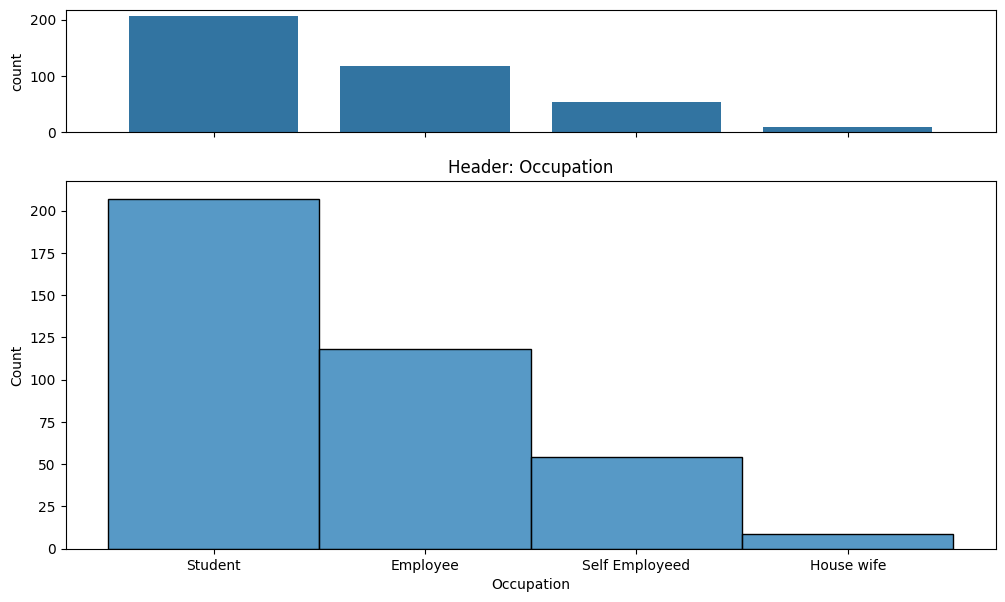

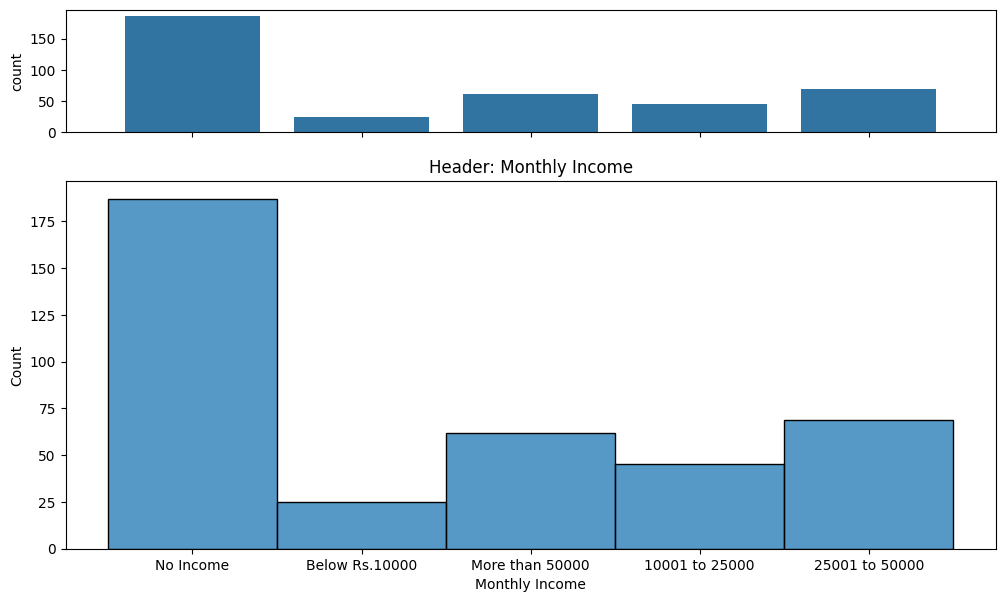

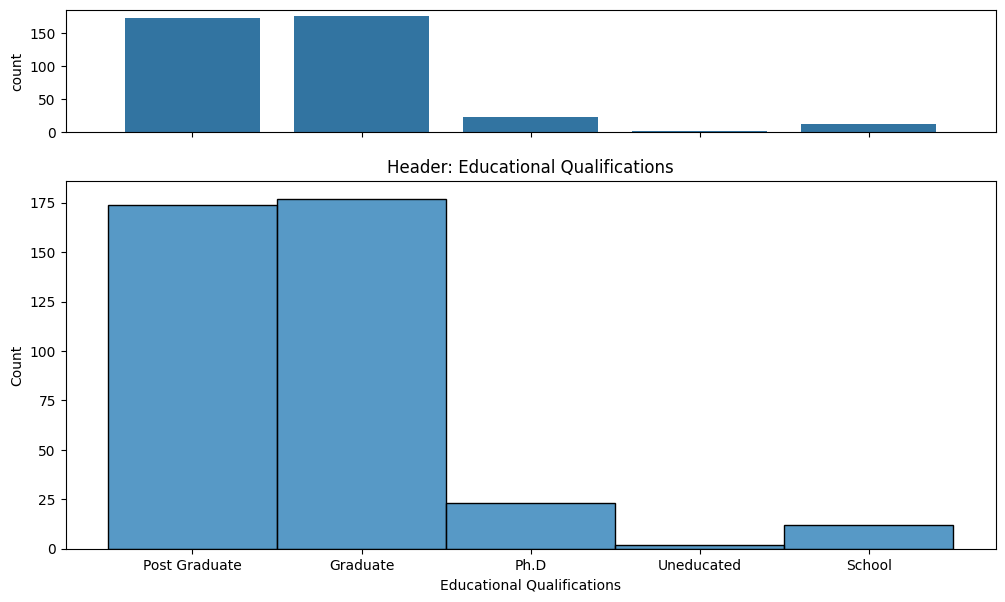

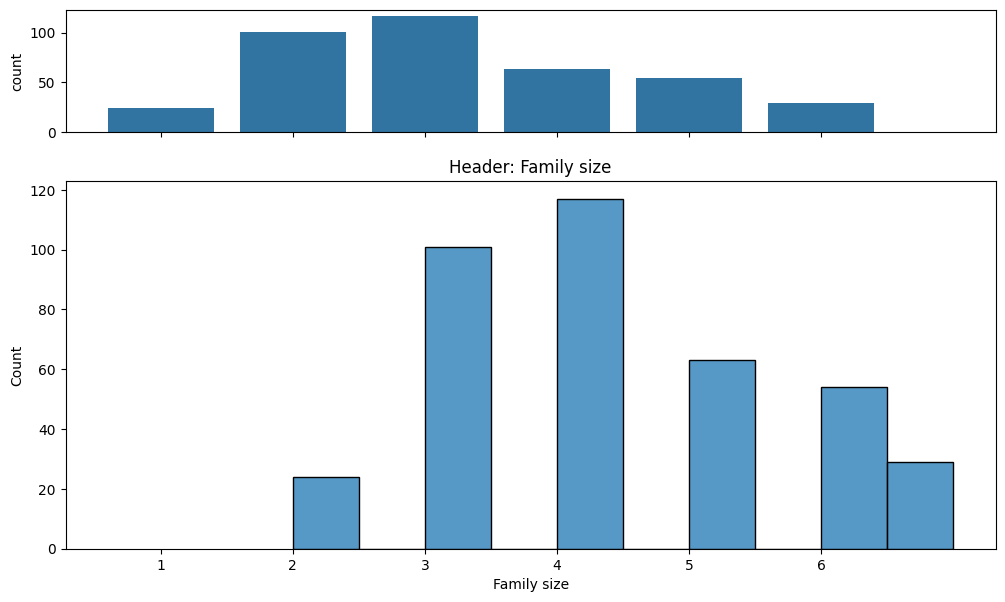

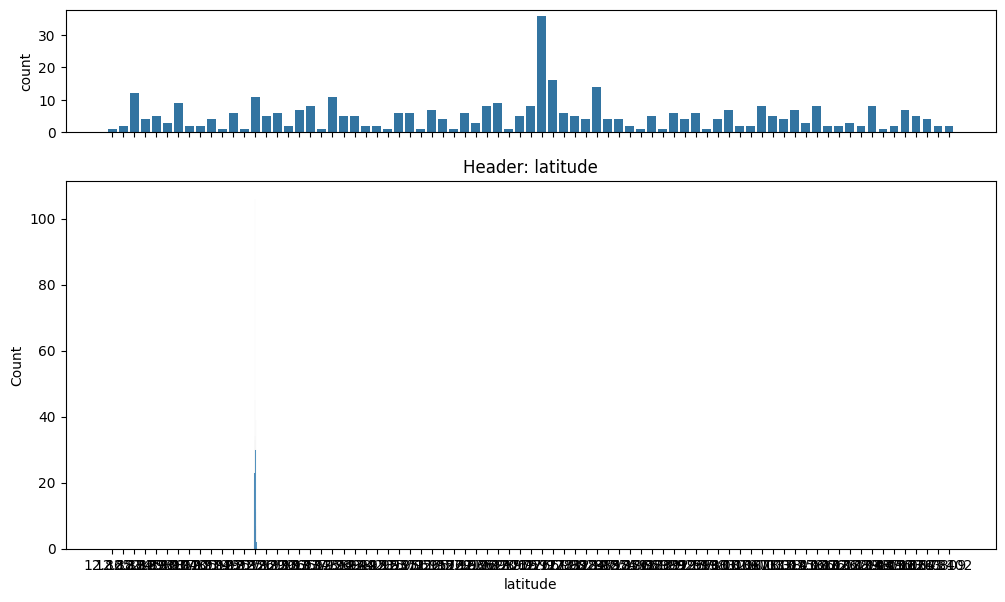

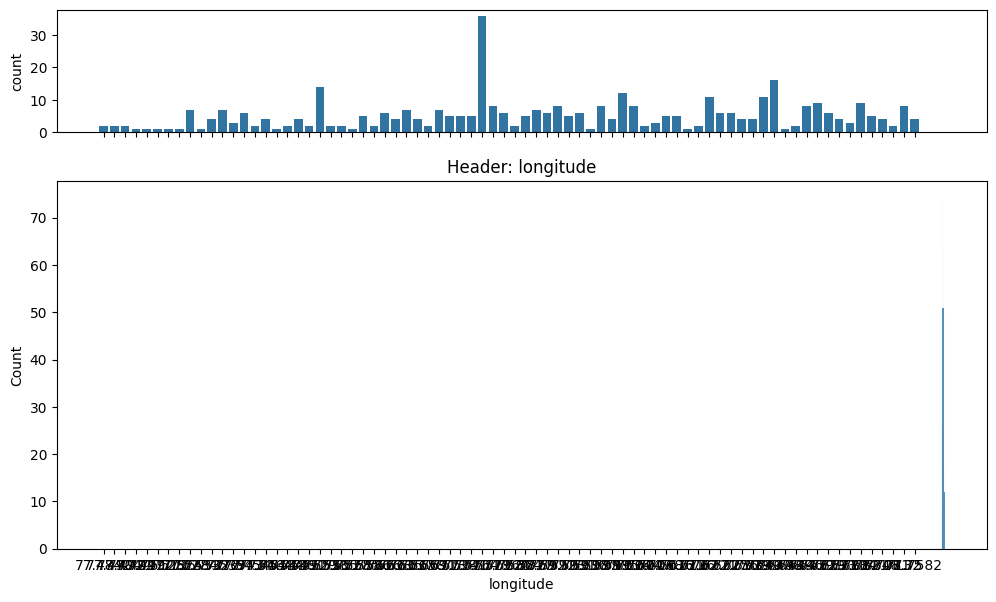

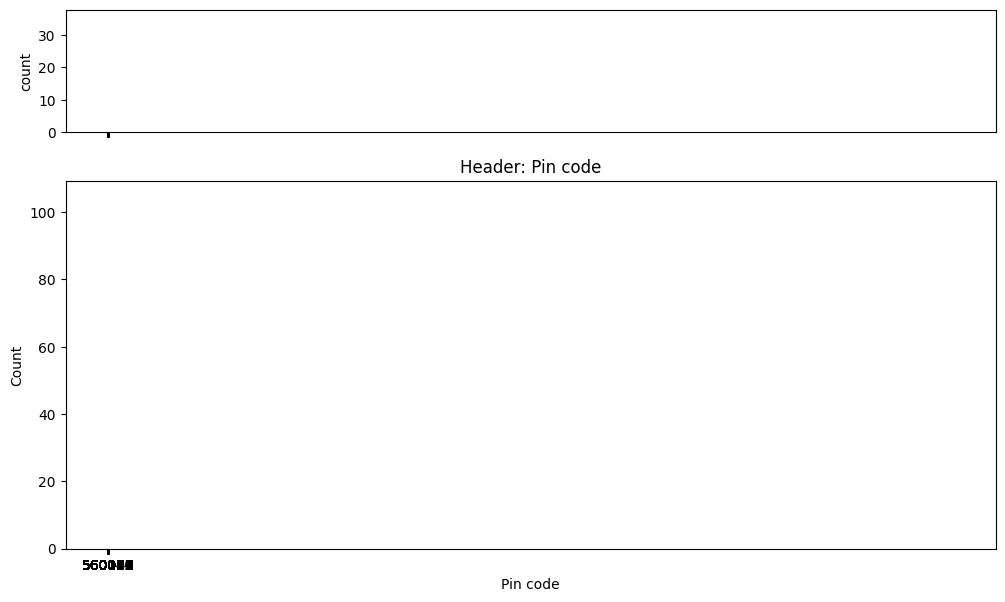

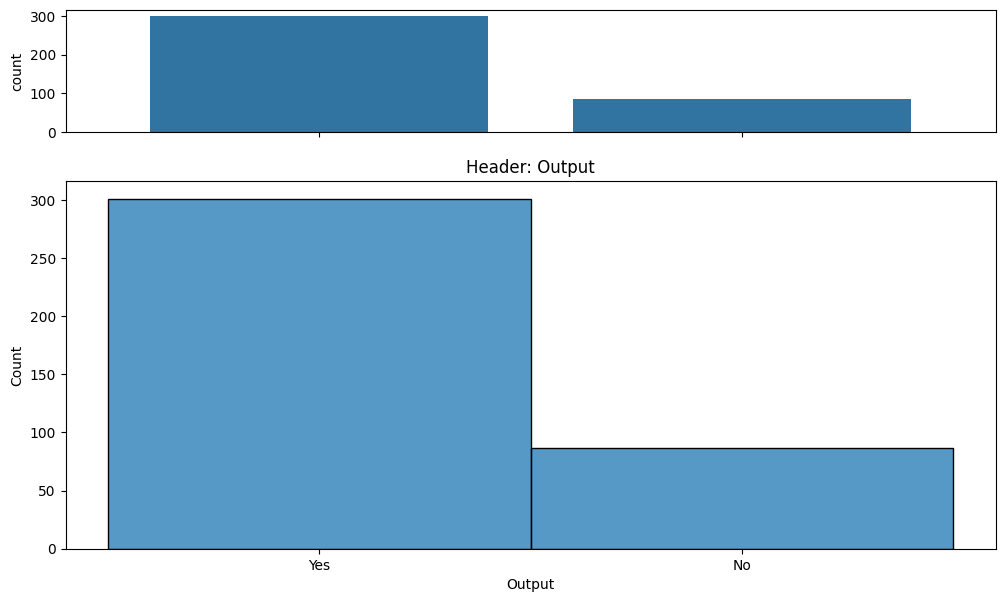

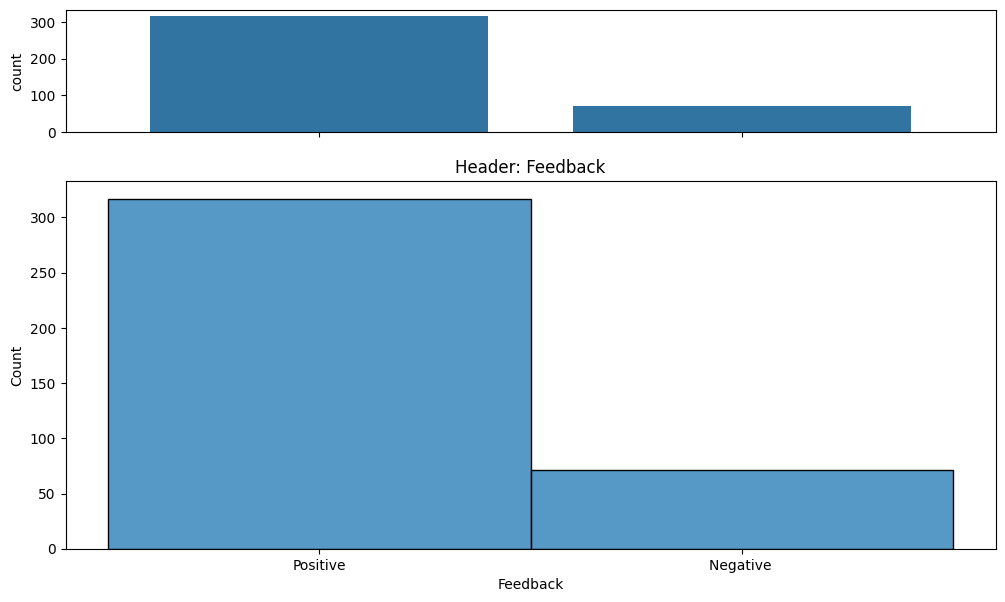

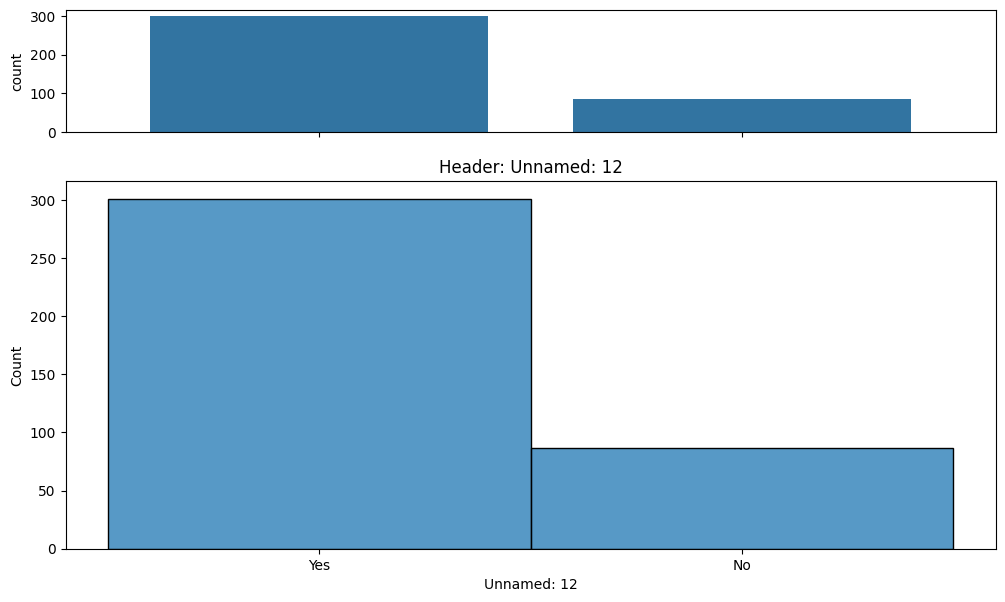

In [46]:
for col in data.columns :
    
    plot_graphs(data, col) #,kde=True)

### Correlation Matrix

In [48]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [49]:
data['Monthly Income']

0           No Income
1      Below Rs.10000
2      Below Rs.10000
3           No Income
4      Below Rs.10000
            ...      
383         No Income
384         No Income
385         No Income
386    Below Rs.10000
387         No Income
Name: Monthly Income, Length: 388, dtype: object

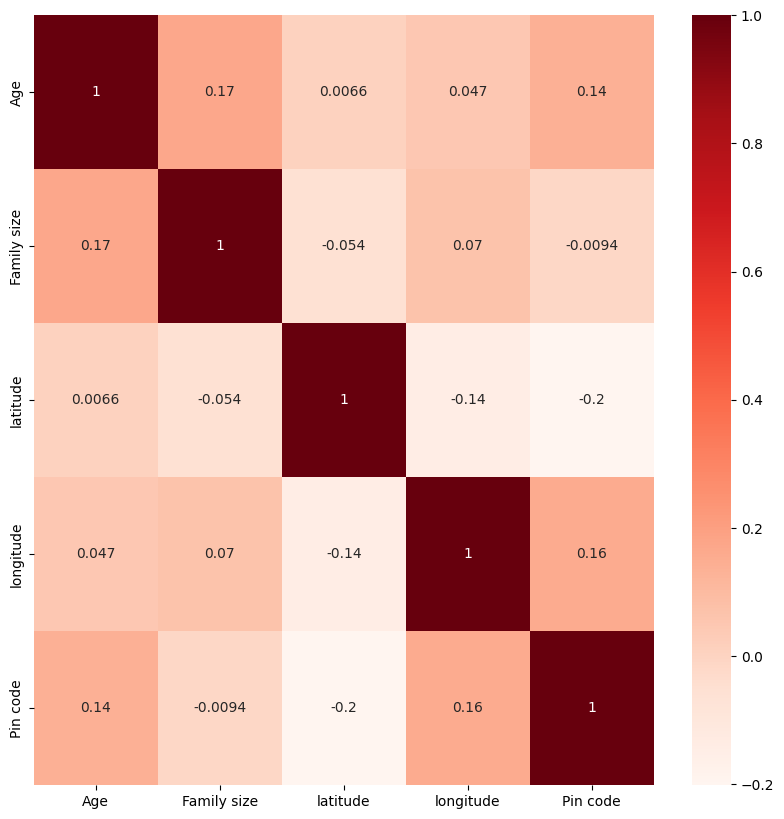

In [50]:
# correlation matrix
cor = data[['Age', 'Family size', 'latitude', 'longitude', 'Pin code']].corr()
# correlation matrix heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## Model Training

In [51]:
new_data = data.copy()

### Encoding

In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
new_data.columns


Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Output', 'Feedback', 'Unnamed: 12'],
      dtype='object')

In [54]:
categoricals = ['Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications', 'Output', 'Feedback']

label_enc = LabelEncoder()
for i in categoricals:
    new_data[i] = label_enc.fit_transform(new_data[i])

In [55]:
new_data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,0,2,3,4,2,4,12.9766,77.5993,560001,1,1,Yes
1,24,0,2,3,2,0,3,12.9770,77.5773,560009,1,1,Yes
2,22,1,2,3,2,2,3,12.9551,77.6593,560017,1,0,Yes
3,22,0,2,3,4,0,6,12.9473,77.5616,560019,1,1,Yes
4,22,1,2,3,2,2,4,12.9850,77.5533,560010,1,1,Yes


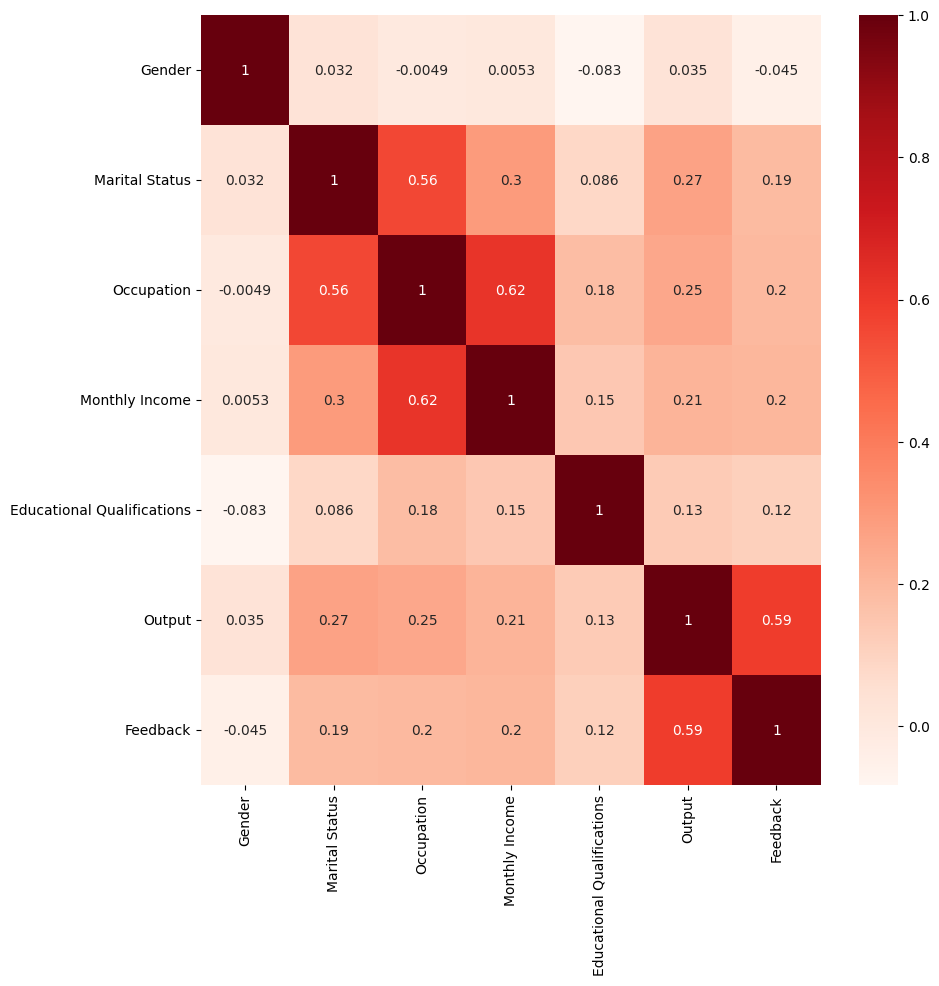

In [56]:
# correlation matrix
cor = new_data[categoricals].corr()
# correlation matrix heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## Splitting Data

#### Features and Labels

In [57]:
X= new_data.drop(['Feedback', 'Unnamed: 12'], axis=1)
y= new_data['Feedback']

#### Train Test Split

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### K Nearest Neighbors Model Training.

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [89]:
knn = KNeighborsClassifier(n_neighbors=8)

In [91]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [92]:
pred = knn.predict(X_test)

### Evaluation Metrics

In [93]:
from sklearn.metrics import classification_report, confusion_matrix

In [94]:
print(confusion_matrix(y_test, pred))

[[ 1 10]
 [ 4 63]]


In [97]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.20      0.09      0.12        11
           1       0.86      0.94      0.90        67

    accuracy                           0.82        78
   macro avg       0.53      0.52      0.51        78
weighted avg       0.77      0.82      0.79        78



### Choosing K Value


In [98]:
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Min error:-  0.1282051282051282 at K = 8


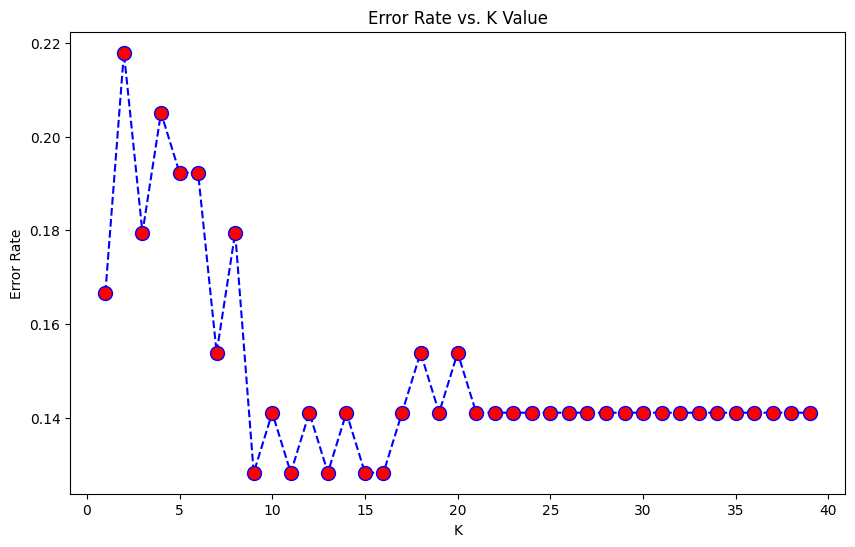

In [99]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Min error:- ",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [100]:
accuracy = []

from sklearn import metrics

# running thru all the K and determine the accurcy

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    pred_i = knn.predict(X_test) #test all the X_test data against y_test class/result for particular K
    accuracy.append(metrics.accuracy_score(y_test, pred_i))

In [101]:
print(accuracy)

[0.8333333333333334, 0.782051282051282, 0.8205128205128205, 0.7948717948717948, 0.8076923076923077, 0.8076923076923077, 0.8461538461538461, 0.8205128205128205, 0.8717948717948718, 0.8589743589743589, 0.8717948717948718, 0.8589743589743589, 0.8717948717948718, 0.8589743589743589, 0.8717948717948718, 0.8717948717948718, 0.8589743589743589, 0.8461538461538461, 0.8589743589743589, 0.8461538461538461, 0.8589743589743589, 0.8589743589743589, 0.8589743589743589, 0.8589743589743589, 0.8589743589743589, 0.8589743589743589, 0.8589743589743589, 0.8589743589743589, 0.8589743589743589, 0.8589743589743589, 0.8589743589743589, 0.8589743589743589, 0.8589743589743589, 0.8589743589743589, 0.8589743589743589, 0.8589743589743589, 0.8589743589743589, 0.8589743589743589, 0.8589743589743589]


In [104]:
max(accuracy)

0.8717948717948718

In [105]:
accuracy.index(max(accuracy))

8

Max accuracy:-  0.8717948717948718 at K = 8


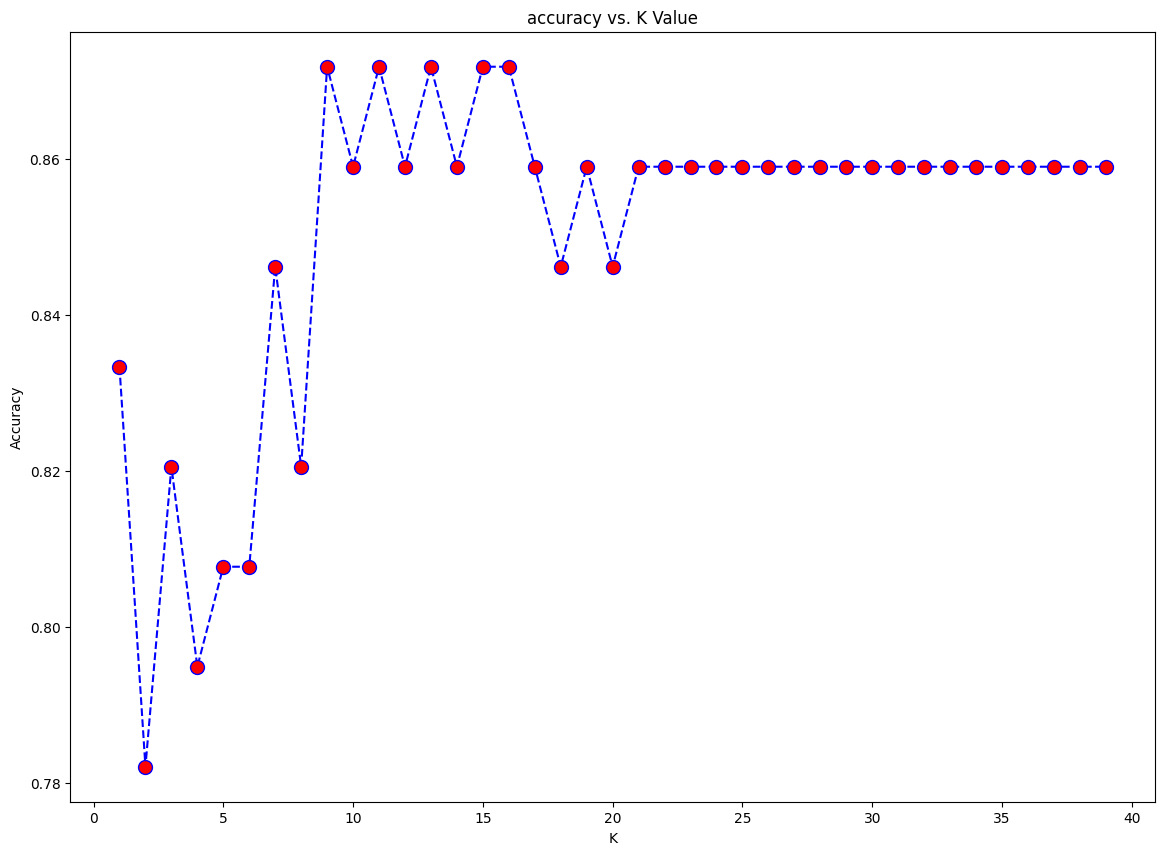

In [106]:
plt.figure(figsize=(14,10))
plt.plot(range(1,40), accuracy, color = 'blue', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Max accuracy:- ",max(accuracy),"at K =",accuracy.index(max(accuracy)))

In [112]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)
pred = knn.predict(X_test)


print('WITH K=23')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K=23


[[ 6  5]
 [ 8 59]]


              precision    recall  f1-score   support

           0       0.43      0.55      0.48        11
           1       0.92      0.88      0.90        67

    accuracy                           0.83        78
   macro avg       0.68      0.71      0.69        78
weighted avg       0.85      0.83      0.84        78

